In [4]:
d = [open('/usr/userfs/s/sjb577/scratch/backups/output/continuedFraction.data.'+str(i), 'r') for i in range(1, 9)]

import csv
all_data = {}
i=0
polys = []

for c in d:
    polys.append(c.readline())

In [5]:
for c in d:
    all_data[polys[i]]= {'cf':[],'sum':[],'mean':[],'double mean':[]}
    reader = csv.reader(c)
    for row in reader:
        all_data[polys[i]]['cf'].append(int(row[0]))
        all_data[polys[i]]['sum'].append(row[1])
        all_data[polys[i]]['mean'].append(float(row[2]))
        all_data[polys[i]]['double mean'].append(float(row[3]))
    i+=1

In [6]:
for c in d:
    c.close()

In [1]:
range(1,9)

[1, 2, 3, 4, 5, 6, 7, 8]

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15.0, 8.0)


Populating the interactive namespace from numpy and matplotlib


In [8]:
def latex_poly(p):
    p = p.split()
    coeffs = p[3:]
    text = coeffs[0][1:-1]  + 'x^0'
    for i in range(1,len(coeffs)):
        text =  ' + ' +coeffs[i][:-1]+'x^' + str(i) + text
    return "$"+ text[2:] +"$"

In [9]:
def plot_alldata(s, polynomials = polys, start=0):
    fig = pyplot.figure()
    ax = fig.add_subplot(111)
    pyplot.rc('text', usetex=True)
    pyplot.rc('font', family='serif')
    plots= []
    for p in polynomials:
        ax.plot(all_data[p][s][start:], label=latex_poly(p))
    pyplot.legend(loc='upper right');
    ax.figure.show()

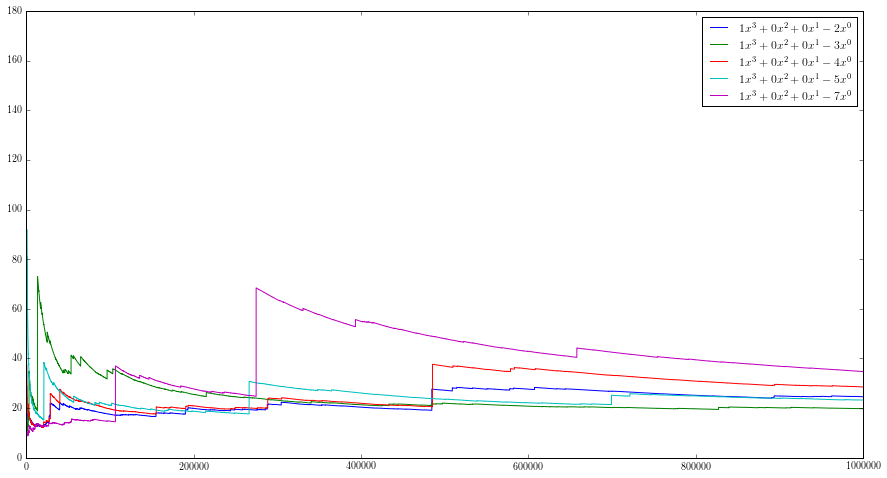

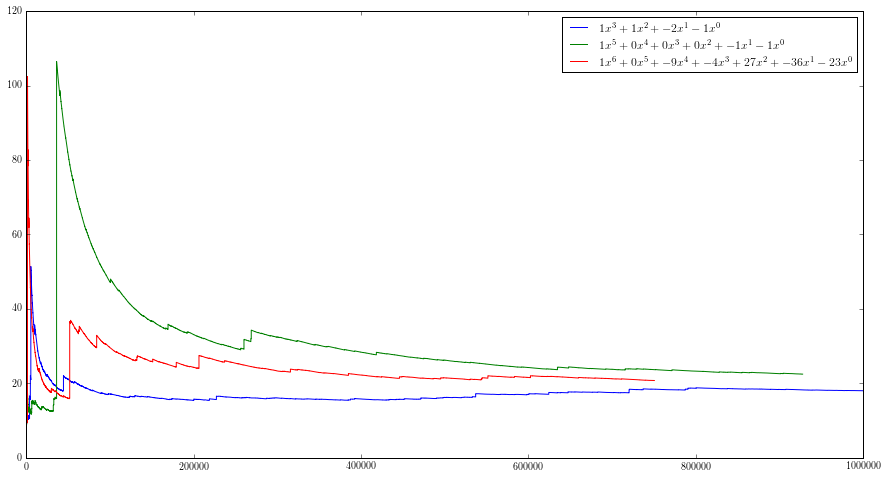

In [38]:
plot_alldata('mean', polynomials=polys[:5], start=10)
plot_alldata('mean', polynomials=polys[5:], start=10)


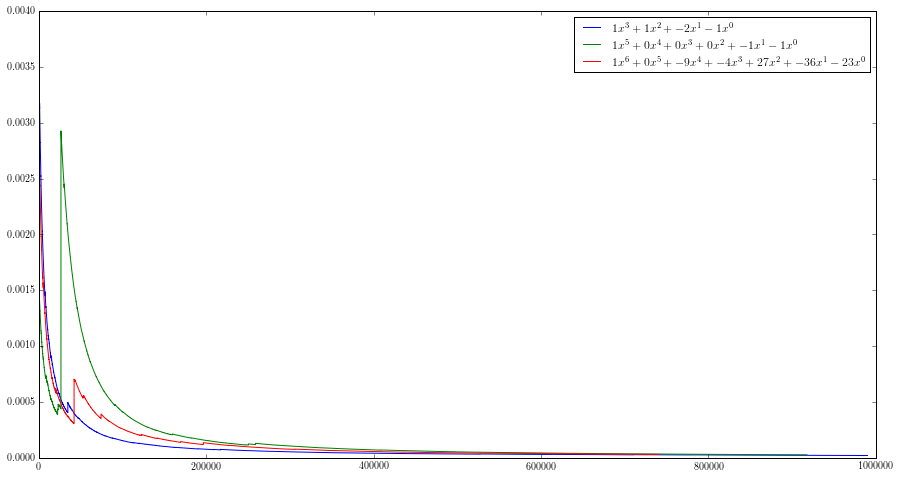

In [12]:
plot_alldata('double mean', polynomials=polys[5:],start=10000)

In [39]:
sympy.poly?

In [48]:
import sympy, re, pprint
x = sympy.symbols('x')
ps = []
for p in polys:
    p = re.sub("[^0-9\-]", ",",p).split(",")
    coeffs = [int(c) for c in p if c!='']
    counter = 0
    y = sympy.poly(0,x)
    for c in coeffs:
        y += sympy.poly(c*x**counter, x)
        counter +=1
    ps.append(y)

pprint.pprint([(p,sympy.discriminant(p)) for p in ps])

[(Poly(x**3 - 2, x, domain='ZZ'), -108),
 (Poly(x**3 - 3, x, domain='ZZ'), -243),
 (Poly(x**3 - 4, x, domain='ZZ'), -432),
 (Poly(x**3 - 5, x, domain='ZZ'), -675),
 (Poly(x**3 - 7, x, domain='ZZ'), -1323),
 (Poly(x**3 + x**2 - 2*x - 1, x, domain='ZZ'), 49),
 (Poly(x**5 - x - 1, x, domain='ZZ'), 2869),
 (Poly(x**6 - 9*x**4 - 4*x**3 + 27*x**2 - 36*x - 23, x, domain='ZZ'),
  67941730271232)]


In [ ]:
from collections import Counter
c = Counter(all_data[polys[0]]['cf'])

In [30]:
pprint.pprint(c.items())

[(1, 414983),
 (2, 169827),
 (3, 93430),
 (4, 58791),
 (5, 40802),
 (6, 29751),
 (7, 22486),
 (8, 18037),
 (9, 14427),
 (10, 11988),
 (11, 10128),
 (12, 8558),
 (13, 7311),
 (14, 6499),
 (15, 5647),
 (16, 5009),
 (17, 4434),
 (18, 4119),
 (19, 3648),
 (20, 3264),
 (21, 2945),
 (22, 2725),
 (23, 2549),
 (24, 2281),
 (25, 2122),
 (26, 1950),
 (27, 1817),
 (28, 1621),
 (29, 1567),
 (30, 1460),
 (31, 1428),
 (32, 1325),
 (33, 1275),
 (34, 1208),
 (35, 1118),
 (36, 1055),
 (37, 994),
 (38, 935),
 (39, 876),
 (40, 841),
 (41, 792),
 (42, 752),
 (43, 729),
 (44, 686),
 (45, 722),
 (46, 674),
 (47, 604),
 (48, 616),
 (49, 608),
 (50, 549),
 (51, 522),
 (52, 506),
 (53, 481),
 (54, 465),
 (55, 450),
 (56, 444),
 (57, 444),
 (58, 409),
 (59, 422),
 (60, 381),
 (61, 349),
 (62, 353),
 (63, 359),
 (64, 348),
 (65, 357),
 (66, 348),
 (67, 289),
 (68, 302),
 (69, 300),
 (70, 298),
 (71, 295),
 (72, 249),
 (73, 264),
 (74, 274),
 (75, 249),
 (76, 239),
 (77, 251),
 (78, 244),
 (79, 236),
 (80, 218),


In [18]:
defaultdict?
